In [11]:
import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# LESSON 3
In this lesson we show the EDA

https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

#### Read data and define constant

In [12]:
df_diamonds = pd.read_csv('../data/diamonds.csv', index_col=0)
id_experiment = datetime.strftime(datetime.now(), '%y_%m_%d_%H-%M-%S')
EXPERIMENT_FOLDER = f'../output/diam_{id_experiment}'
os.makedirs(EXPERIMENT_FOLDER, exist_ok=True)

COLUMN_NAMES = list(df_diamonds.columns)
COLUMNS_CAT = ['cut', 'color', 'clarity']
NUMERIC_COLUMNS = [col for col in COLUMN_NAMES if col not in COLUMNS_CAT]
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [14]:
describe = df_diamonds.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
describe.to_json(f'{EXPERIMENT_FOLDER}/describe.json', indent=4)
describe

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
90%,1.510000,63.300000,60.000000,9821.000000,7.310000,7.300000,4.520000
95%,1.700000,63.800000,61.000000,13107.100000,7.660000,7.650000,4.730000
99%,2.180000,65.600000,64.000000,17378.220000,8.360000,8.340000,5.150000


#### Distribution of variables

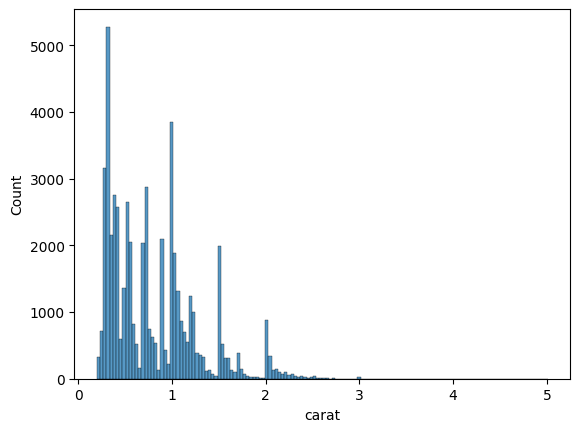

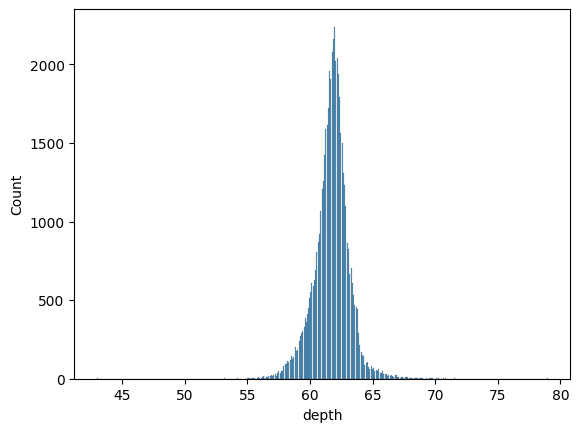

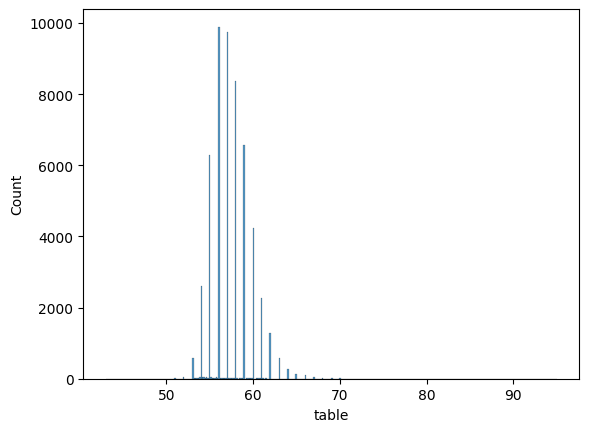

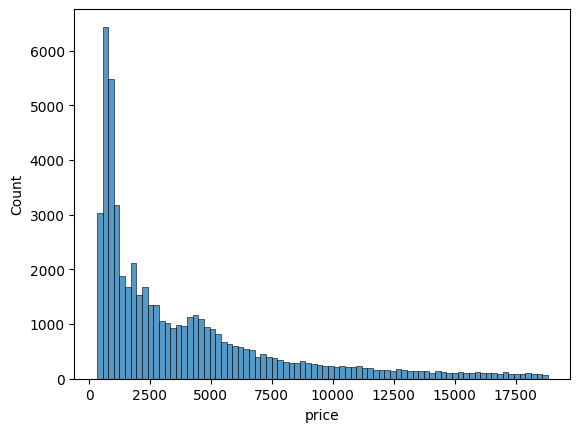

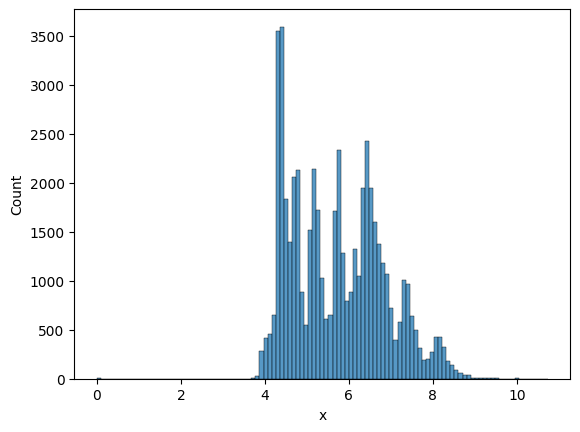

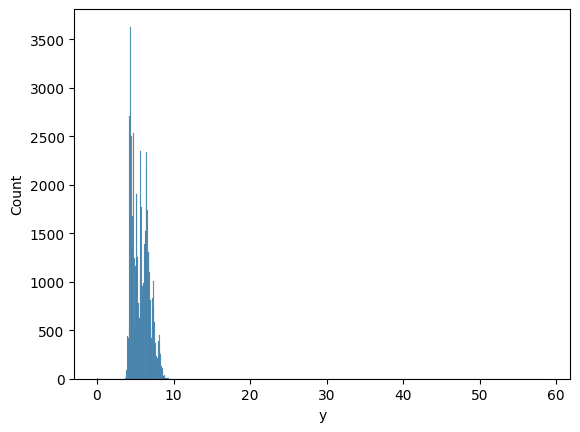

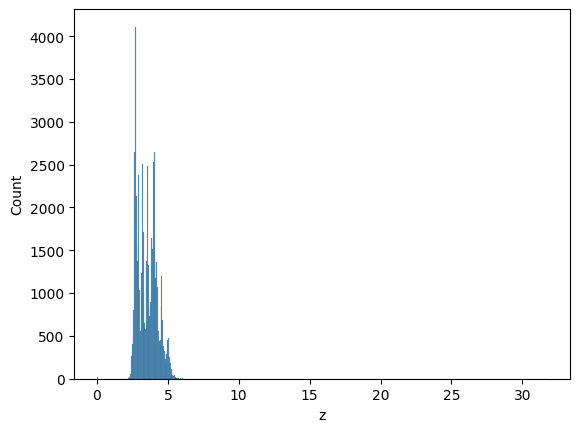

In [15]:
os.makedirs(os.path.join(EXPERIMENT_FOLDER, 'distr'), exist_ok=True)
for col in NUMERIC_COLUMNS:
    plt.figure()
    sns.histplot(df_diamonds[col])
    plt.savefig(f'{EXPERIMENT_FOLDER}/distr/{col}.png')

#### Outliers Analysis

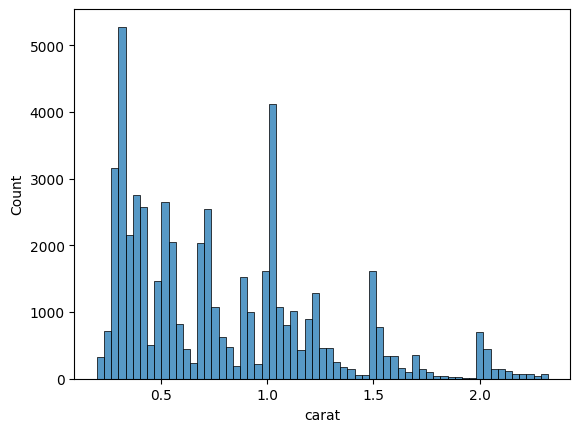

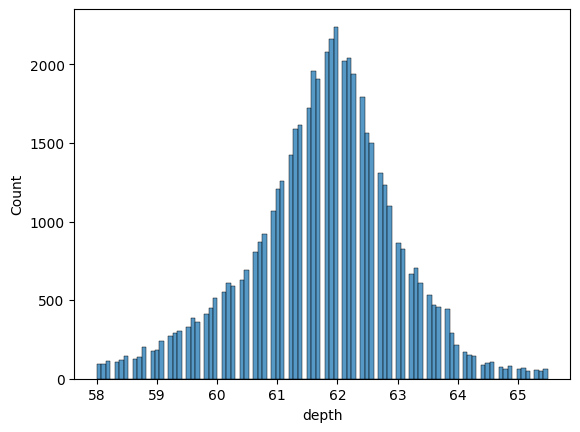

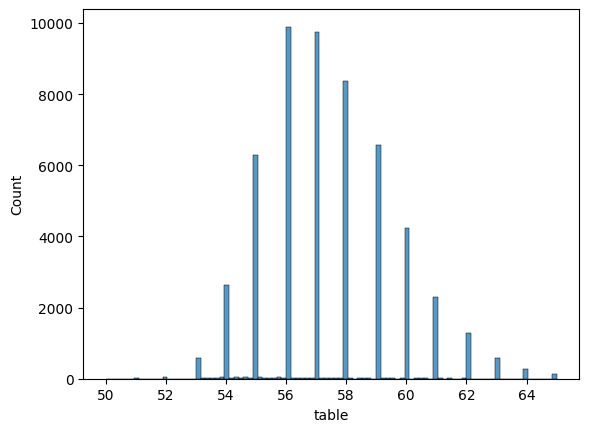

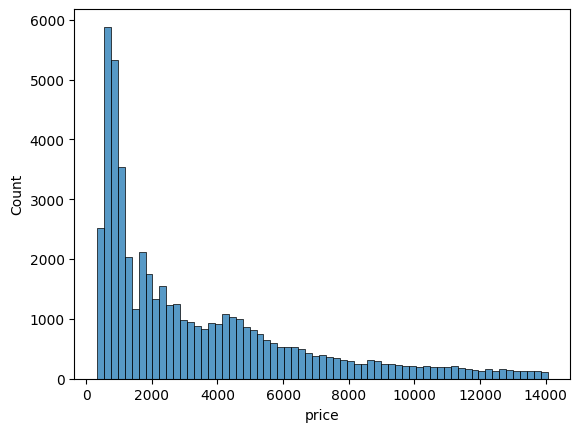

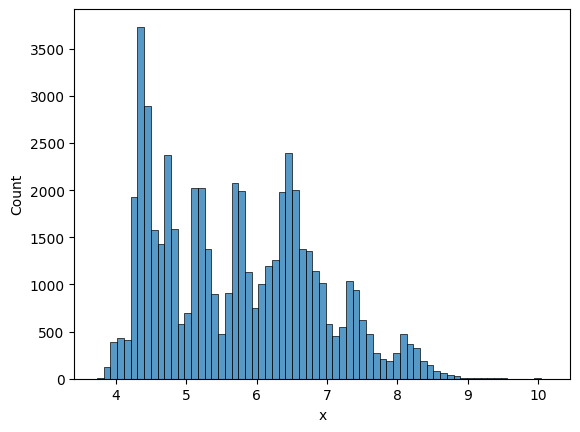

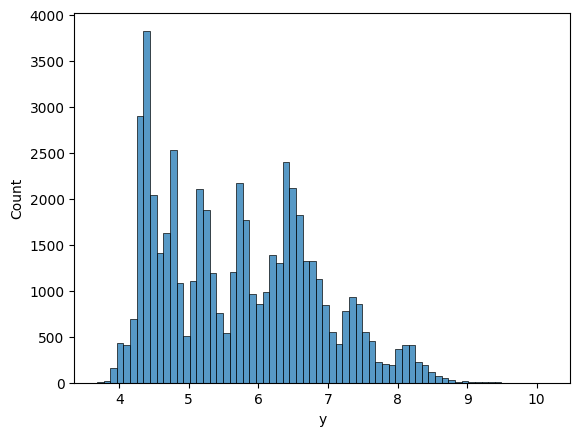

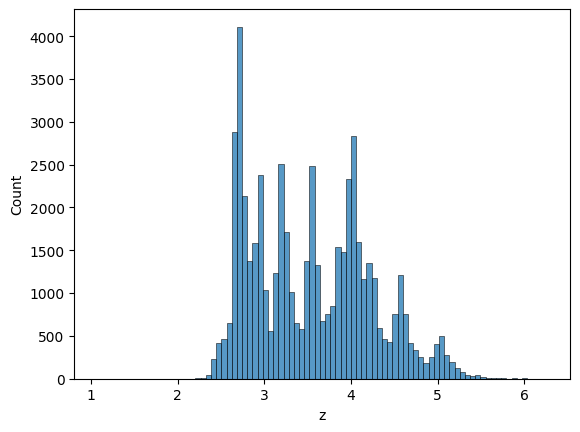

In [16]:
os.makedirs(os.path.join(EXPERIMENT_FOLDER, 'distr_clean'), exist_ok=True)
catch_outliers = {}
for col in NUMERIC_COLUMNS:
    Q1 = np.percentile(df_diamonds[col], 25)
    Q3 = np.percentile(df_diamonds[col], 75)
    IQR= Q3-Q1
    upper = Q3+2*IQR
    lower = Q1-2*IQR
    list_idx_out = list(df_diamonds[df_diamonds[col].between(lower, upper) == False].index)
    catch_outliers[col] = (len(list_idx_out), list_idx_out)
    tmp_df = df_diamonds[df_diamonds[col].between(lower, upper)].copy()
    fig = plt.figure()
    sns.histplot(tmp_df[col])
    plt.savefig(f'{EXPERIMENT_FOLDER}/distr_clean/{col}.png')

In [17]:
list_idx_out = [] 
for col in catch_outliers:
    list_idx_out += catch_outliers[col][1]
set_id_out = set(list_idx_out)

df_diamonds_clean = df_diamonds.drop(index=list(set_id_out))

#### Correlation Analysis

<Axes: >

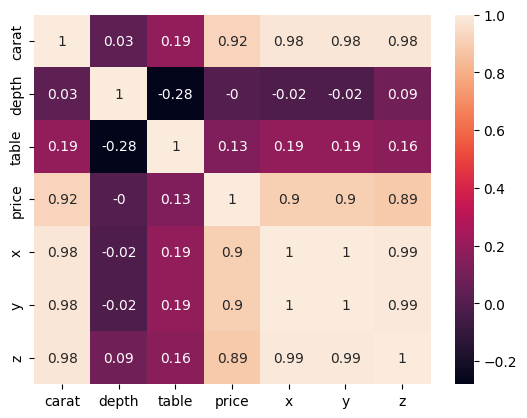

In [18]:
df_corr = df_diamonds_clean[NUMERIC_COLUMNS].corr()
df_corr = np.round(df_corr, 2)
sns.heatmap(df_corr, annot=True)

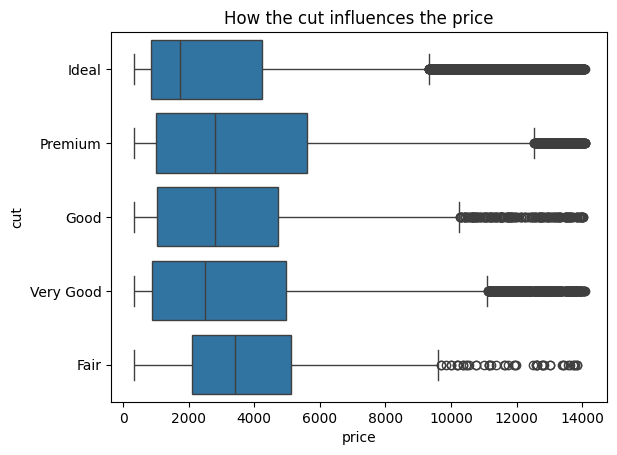

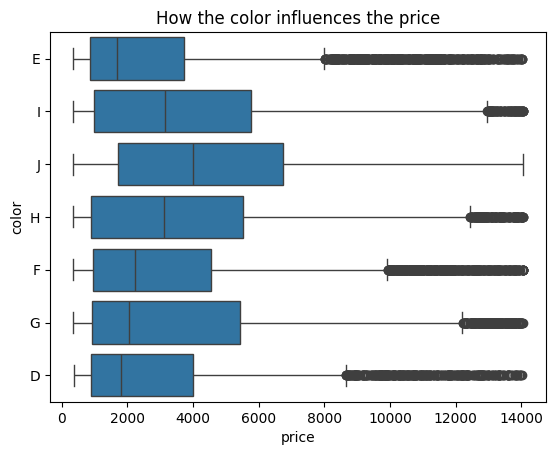

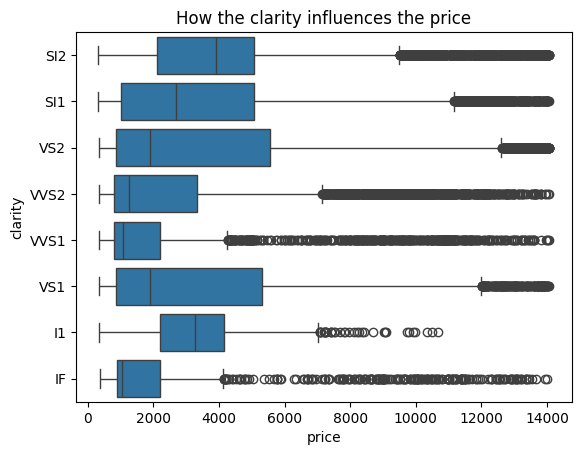

In [19]:
for c in COLUMNS_CAT:
    title='How the ' + c + ' influences the price' 
    sns.boxplot(data=df_diamonds_clean, x='price', y=c).set(title=title)
    plt.show()

#### Scatter 

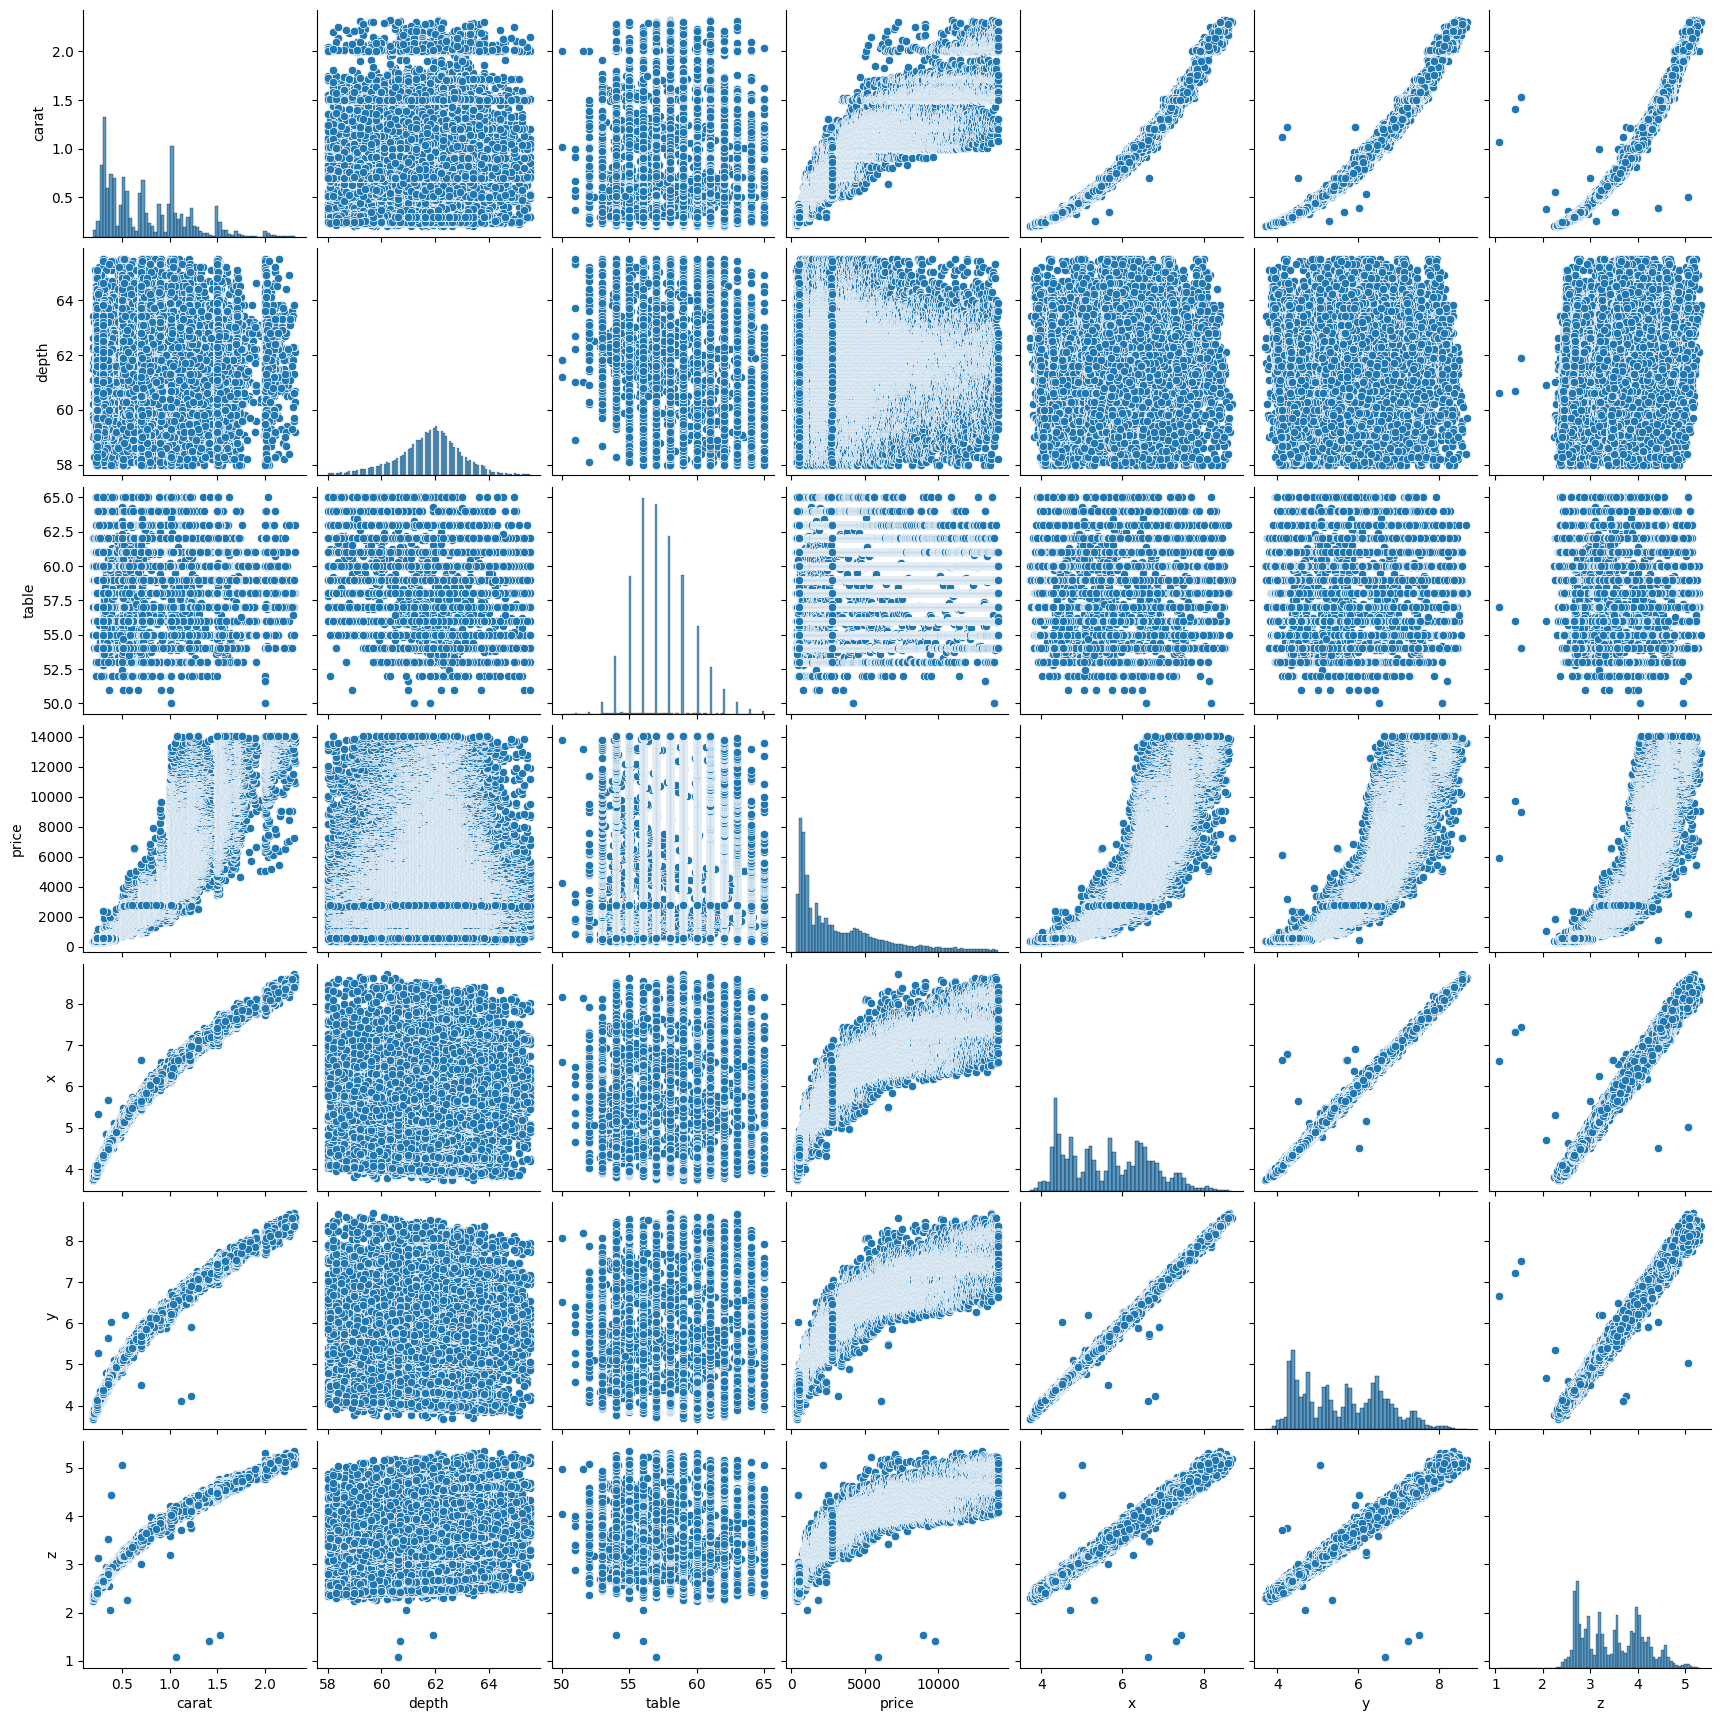

In [20]:
sns.pairplot(df_diamonds_clean)